In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import svd
import pandas as pd
import requests

#### Used **NumPy** library to load the **.txt** data and got the **X**, **Y**,  and **Z** cordintates to plot the 3D grapgh below 

In [5]:
# Importing the bridge.txt and naming it data 
data = np.loadtxt("bridge.txt")


# Got the data into an array and called the first, second and third cordinates  interms of X, Y and Z
X = data[0]
Y = data[1]
Z = data[2]

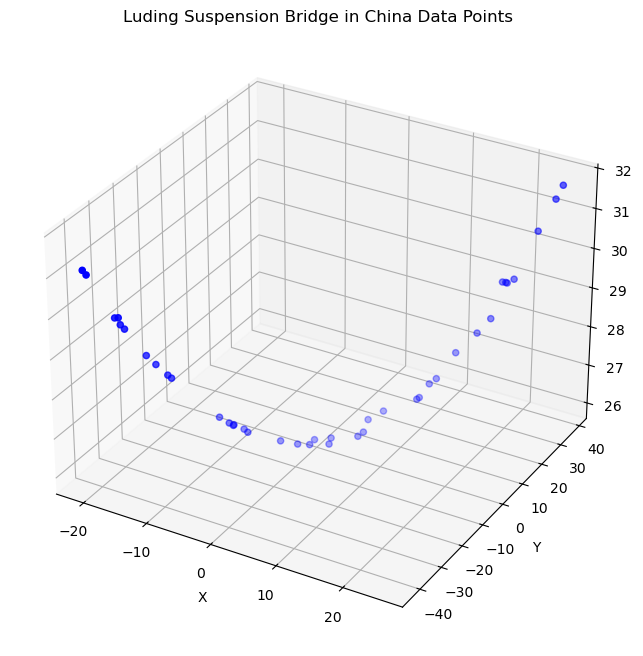

In [7]:
# Created a 3D scatter plot since we have three cordinates ie altitudes, longitude and latitude.
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c="b", marker="o")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title('Luding Suspension Bridge in China Data Points')
plt.show()

#### Apply the **PCA** to reconstruct the plane containig the curve

In [11]:
# Get the data matrix by stacking arrays in sequence vertically (row wise) and then transpose it. To get a dx3 matrix
data_matrix = np.vstack((X, Y, Z)).T 

# Have to center the data by finding the mean of each columns and subtracting it from the data matrix
mean_vector = np.mean(data_matrix, axis=0)
centered_data = data_matrix - mean_vector

# Calculate the covariance matrix usi
cov_matrix = np.cov(centered_data, rowvar=False)
print("Covariance Matrix:\n", cov_matrix)


# Find the eigenvectors and eigenvalues of the covariance matrix and after that we will sort them
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Sort the eigenvalues and eigenvectors in descending order
sort = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[sort]
eigenvectors = eigenvectors[:, sort]
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors (columns):")
print(eigenvectors)

# Now, we choose the first 2 eigenvectors where 2 is the number of dimensions of the new feature subspace
component_1 = eigenvectors[:, 0]
component_2 = eigenvectors[:, 1]
normal = eigenvectors[:, 2] 
print("\nThe two principal components defining the plane:")
print(f"component_1: {component_1}")
print(f"component_2: {component_2}")
print(f"Normal vector to the plane: {normal}")

Covariance Matrix:
 [[208.71783001 358.20018861   1.09281871]
 [358.20018861 617.13882653   2.31260458]
 [  1.09281871   2.31260458   3.10396759]]

Eigenvalues:
[8.25258072e+02 3.11481303e+00 5.87738796e-01]

Eigenvectors (columns):
[[ 0.50235649 -0.07602274  0.86131208]
 [ 0.86465505  0.04059672 -0.50072303]
 [ 0.00309989  0.9962793   0.08612747]]

The two principal components defining the plane:
component_1: [0.50235649 0.86465505 0.00309989]
component_2: [-0.07602274  0.04059672  0.9962793 ]
Normal vector to the plane: [ 0.86131208 -0.50072303  0.08612747]


#### Create a projcection matrix of 3x3 by uisng **NumPy** Library which helped us find the projected data.

In [14]:
v1 = eigenvectors[:, 0]
v2 = eigenvectors[:, 1]
# Use numpy.column_stack that take a sequence of 1-D arrays and stack them as columns to make a single 2-D array.
V = np.column_stack((v1, v2)) 
# Calculate the projection matrix
projection_matrix = V @ V.T  
print("Projection matrix:\n", projection_matrix)

# Project the centered data onto the plane, Add the mean back to get the actual coordinates
projected_data = centered_data @ projection_matrix
projected_points = projected_data + mean_vector
print(projected_points.shape)
print("\nProjected points:\n", projected_points)


Projection matrix:
 [[ 0.25814149  0.4312788  -0.07418263]
 [ 0.4312788   0.74927645  0.04312601]
 [-0.07418263  0.04312601  0.99258206]]
(40, 3)

Projected points:
 [[ 11.30931086  12.7876015   26.80191992]
 [ -7.40566113 -19.40097375  26.82363836]
 [ 20.62075444  29.26871512  29.50041212]
 [-17.10639067 -35.621533    29.53297113]
 [-14.24894859 -30.87476189  28.55382035]
 [-13.25769546 -29.23843156  28.15406394]
 [ -5.64039444 -16.41663351  26.52039433]
 [ -5.22711419 -15.68912894  26.61693742]
 [ 20.26998635  28.65740593  29.45425037]
 [  7.2840227    5.79754817  26.41817055]
 [-13.45591763 -29.56378905  28.24482657]
 [ 23.18620854  33.8761832   30.63139589]
 [ 20.28075675  28.67237567  29.43357185]
 [  0.51214638  -5.92691105  25.97687279]
 [  1.67319576  -3.91034247  26.0896878 ]
 [-17.36837006 -36.05106185  29.65570808]
 [ -0.61949751  -7.86344467  26.03529297]
 [ -7.7565792  -19.97258285  27.00978253]
 [ 24.79603572  36.77208593  31.36846141]
 [-14.90222347 -31.95395786  28.8126

#### Calculate an orthogonal transformation that moves the plane into one of the coordinate planes

In [17]:
# Create a orthogonal transformation matrix using the eigenvectors the eigenvectors of the covariance matrix form an orthogonal basis
rotation_matrix = eigenvectors
print("Rotation matrix:\n", rotation_matrix)

# Check to see if the orthogonal transformation matrix the answer should be closed to an identity mattrix
check_orthogonal = rotation_matrix.T @ rotation_matrix
print("\nVerify orthogonality it should be close to identity:")
print(check_orthogonal)

# Apply the transformation to the centered data
transformed_data = centered_data @ rotation_matrix

# The last coordinate should be close to zero for all points (as it's the smallest component)
print("\nMax absolute value in the third dimension after transformation:")
print(np.max(np.abs(transformed_data[:, 2])))

# Add a zero vector for the third coordinate to get points on the exact plane
planar_data = transformed_data.copy()
planar_data[:, 2] = 0

Rotation matrix:
 [[ 0.50235649 -0.07602274  0.86131208]
 [ 0.86465505  0.04059672 -0.50072303]
 [ 0.00309989  0.9962793   0.08612747]]

Verify orthogonality it should be close to identity:
[[ 1.00000000e+00 -6.34349339e-18 -1.79252995e-17]
 [-6.34349339e-18  1.00000000e+00  3.47869522e-17]
 [-1.79252995e-17  3.47869522e-17  1.00000000e+00]]

Max absolute value in the third dimension after transformation:
1.5735407916198862


#### Gaussian approximation with polynomial basis to obtain anequation of the curve

In [20]:
# Have to extract the first two coordinates of the transformed data
points_2d = transformed_data[:, :2]

# Sorted the points along the first principal component
sorted_indices = np.argsort(points_2d[:, 0])
sorted_points = points_2d[sorted_indices]

# Let's use the x-coordinate as our parameter t
t = sorted_points[:, 0]
y_values = sorted_points[:, 1]

# If the curve is plotted it has catenary shape, which can be modeled as y = a * cosh(x/a)
# With a degree of 5 to 10 will be the best degree for the polynomial to use since it decreases the error
degree = 5
A = np.zeros((len(t), degree + 1))
for i in range(degree + 1):
    A[:, i] = t ** i

# Solve the least squares problem
coeffs_y = np.linalg.lstsq(A, y_values, rcond=None)[0]

print("Polynomial coefficients for y(t):")
print(coeffs_y)

# Create matrix of coefficients for each coordinate
parametric_coeffs_transformed = np.zeros((3, degree + 1))
parametric_coeffs_transformed[0, 1] = 1  # x(t) = t
parametric_coeffs_transformed[1, :] = coeffs_y  # y(t) = polynomial
# z(t) = 0 (all coefficients remain 0)

print("\nParametric equation coefficients in transformed space:\n", parametric_coeffs_transformed)

Polynomial coefficients for y(t):
[-2.01671950e+00 -2.60845354e-03  2.48212708e-03  8.03716879e-07
  1.72273445e-08 -1.65954358e-10]

Parametric equation coefficients in transformed space:
 [[ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.01671950e+00 -2.60845354e-03  2.48212708e-03  8.03716879e-07
   1.72273445e-08 -1.65954358e-10]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [22]:
# The inverse is the same as the transpose for the  orthogonal matrix
inverse_rotation = rotation_matrix.T

# Initialize the coefficient matrix for the original space
parametric_coeffs_original = np.zeros((3, degree + 1))

# Transform each coefficient
for i in range(degree + 1):
    # Extract the coefficient vector for t^i
    coeff_vector_transformed = parametric_coeffs_transformed[:, i]
    
    # Transform the coefficient vector back to original space
    coeff_vector_original = coeff_vector_transformed @ inverse_rotation
    
    # Store in the coefficient matrix
    parametric_coeffs_original[:, i] = coeff_vector_original

# For the constant term (t^0), we need to add the mean vector
parametric_coeffs_original[:, 0] += mean_vector

print("Parametric equation coefficients in original space:\n", parametric_coeffs_original)


#The parametric equation of the curve
print("\nFinal parametric equation of the curve in the original space:")
print("c(t) = (x(t), y(t), z(t)) where:")

# Display the polynomial for each coordinate
for i, coord in enumerate(['x', 'y', 'z']):
    poly_str = f"{coord}(t) = "
    for j in range(degree + 1):
        if j == 0:
            poly_str += f"{parametric_coeffs_original[i, j]:.6f}"
        else:
            if parametric_coeffs_original[i, j] >= 0:
                poly_str += f" + {parametric_coeffs_original[i, j]:.6f}t^{j}"
            else:
                poly_str += f" - {abs(parametric_coeffs_original[i, j]):.6f}t^{j}"
    print(poly_str)

print("\nCoefficient matrix in the basis of monomials [1, t, t^2, t^3, t^4, t^5]:")
print(parametric_coeffs_original)

Parametric equation coefficients in original space:
 [[ 2.10428674e+00  5.02554787e-01 -1.88698097e-04 -6.11007579e-08
  -1.30966990e-09  1.26163047e-11]
 [-3.18279595e+00  8.64549154e-01  1.00766210e-04  3.26282667e-08
   6.99373628e-10 -6.73720210e-12]
 [ 2.60083599e+01  5.01144766e-04  2.47289184e-03  8.00726493e-07
   1.71632468e-08 -1.65336892e-10]]

Final parametric equation of the curve in the original space:
c(t) = (x(t), y(t), z(t)) where:
x(t) = 2.104287 + 0.502555t^1 - 0.000189t^2 - 0.000000t^3 - 0.000000t^4 + 0.000000t^5
y(t) = -3.182796 + 0.864549t^1 + 0.000101t^2 + 0.000000t^3 + 0.000000t^4 - 0.000000t^5
z(t) = 26.008360 + 0.000501t^1 + 0.002473t^2 + 0.000001t^3 + 0.000000t^4 - 0.000000t^5

Coefficient matrix in the basis of monomials [1, t, t^2, t^3, t^4, t^5]:
[[ 2.10428674e+00  5.02554787e-01 -1.88698097e-04 -6.11007579e-08
  -1.30966990e-09  1.26163047e-11]
 [-3.18279595e+00  8.64549154e-01  1.00766210e-04  3.26282667e-08
   6.99373628e-10 -6.73720210e-12]
 [ 2.600835